In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_trn = pd.read_csv('train.csv')

In [3]:
df_tst = pd.read_csv('test.csv')

In [4]:
df_trn.head(3)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3


In [5]:
df_tst.head(3)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69


# Data Clean for Train set

In [6]:
df_trn.shape

(400, 15)

In [7]:
df_trn.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df_trn.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
len(df_trn.ID.unique())

400

In [10]:
df_trn.drop(['ID'], axis = 1, inplace = True)
df_trn = df_trn.drop_duplicates()

In [11]:
df_trn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
q3 = df_trn.CRIM.quantile(0.75)
q1 = df_trn.CRIM.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-5.1205912499999995, 8.74183875)

In [13]:
df_trn.CRIM = df_trn.CRIM.clip(-5.12, 8.74)

In [14]:
q3 = df_trn.ZN.quantile(0.75)
q1 = df_trn.ZN.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-18.75, 31.25)

In [15]:
df_trn.ZN = df_trn.ZN.clip(-18.75, 31.25)

In [16]:
q3 = df_trn.INDUS.quantile(0.75)
q1 = df_trn.INDUS.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-14.325000000000006, 37.55500000000001)

In [17]:
q3 = df_trn.LSTAT.quantile(0.75)
q1 = df_trn.LSTAT.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-7.889999999999999, 31.79)

In [18]:
df_trn.LSTAT = df_trn.LSTAT.clip(-7.89, 31.79)

In [19]:
q3 = df_trn.MEDV.quantile(0.75)
q1 = df_trn.MEDV.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.2500000000000036, 36.849999999999994)

In [20]:
df_trn.MEDV = df_trn.MEDV.clip(5.25, 36.85)

In [21]:
df_trn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,2.169648,6.820000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.62655,21.796000
std,3.224392,11.918719,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.08280,7.560084
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.92000,5.250000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.99000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.87500,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.91000,25.000000
max,8.740000,31.250000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,31.79000,36.850000


# Data Clean for Test set

In [22]:
df_tst

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [23]:
df_tst.drop(['ID'], axis = 1, inplace = True)
df_tst = df_tst.drop_duplicates()

In [24]:
df_tst.shape

(105, 13)

In [25]:
df_tst.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [26]:
df_tst.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.100574,12.800000,11.984095,0.057143,0.562010,6.253181,70.469524,3.699209,9.961905,426.219048,18.472381,345.695333,12.667238
std,6.099267,25.384978,6.854823,0.233229,0.118159,0.679369,27.410123,2.017964,8.814241,164.240090,2.227041,106.976156,6.912011
min,0.013600,0.000000,1.320000,0.000000,0.392000,3.561000,6.800000,1.285200,1.000000,188.000000,12.600000,3.650000,1.730000
25%,0.100840,0.000000,6.090000,0.000000,0.449000,5.949000,47.200000,2.063500,4.000000,300.000000,16.600000,373.660000,7.120000
50%,0.290900,0.000000,9.900000,0.000000,0.544000,6.195000,78.100000,2.783100,5.000000,391.000000,19.100000,390.740000,12.260000
75%,4.261310,12.500000,18.100000,0.000000,0.624000,6.631000,94.500000,5.116700,24.000000,666.000000,20.200000,395.620000,17.160000
max,45.746100,100.000000,27.740000,1.000000,0.871000,7.929000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,36.980000


In [27]:
q3 = df_tst.CRIM.quantile(0.75)
q1 = df_tst.CRIM.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-6.139865, 10.502015)

In [28]:
df_tst.CRIM = df_tst.CRIM.clip(-6.14, 10.50)

In [29]:
q3 = df_tst.ZN.quantile(0.75)
q1 = df_tst.ZN.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-18.75, 31.25)

In [30]:
df_tst.ZN = df_tst.ZN.clip(-18.75, 31.25)

In [31]:
q3 = df_tst.LSTAT.quantile(0.75)
q1 = df_tst.LSTAT.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-7.939999999999999, 32.22)

In [32]:
df_tst.LSTAT = df_tst.LSTAT.clip(-7.94, 32.22)

# Correlation

<AxesSubplot:>

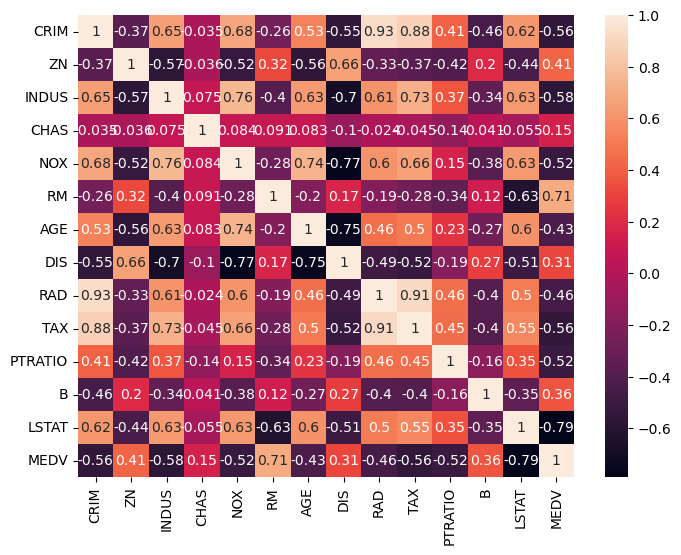

In [33]:
corr = df_trn.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True)

CHAS have no correlation with MEDV, so we drop the same and we drop CRIM also because I dont see CRIM have nothing todo with it

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

# Model

In [35]:
X = df_trn[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_trn['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])


def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    
    

model(LinearRegression())
model(Ridge())
model(Lasso())    

In [36]:
R2_score

LinearRegression()    0.780596
Ridge()               0.780096
Lasso()               0.699059
dtype: float64

In [37]:
intercept

LinearRegression()    34.175355
Ridge()               29.111589
Lasso()               40.166359
dtype: float64

In [38]:
df_coef

,LinearRegression(),Ridge(),Lasso()
ZN,0.033252,0.036138,0.050214
INDUS,-0.000602,-0.033098,-0.006529
NOX,-14.874181,-7.129965,-0.000000
RM,2.863207,2.860363,0.000000
AGE,-0.006157,-0.012687,0.020818
DIS,-0.981686,-0.882854,-0.278016
RAD,0.162371,0.147407,0.151506
TAX,-0.009839,-0.010289,-0.012796
PTRATIO,-0.741968,-0.660262,-0.507129
B,0.010635,0.011287,0.008374


# Model with all Features

In [39]:
df_trn.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
X = df_trn[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_trn['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)


R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])


def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    
model(LinearRegression())
model(Ridge())
model(Lasso())


In [41]:
intercept

LinearRegression()    33.165840
Ridge()               28.414764
Lasso()               40.166300
dtype: float64

In [42]:
R2_score

LinearRegression()    0.788415
Ridge()               0.788644
Lasso()               0.699058
dtype: float64

In [43]:
df_coef

,LinearRegression(),Ridge(),Lasso()
CRIM,-0.247824,-0.317539,-0.000000
ZN,0.034160,0.037427,0.050213
INDUS,-0.031819,-0.062471,-0.006540
CHAS,1.911439,1.845377,0.000000
NOX,-14.028555,-6.620196,-0.000000
RM,2.804615,2.797187,0.000000
AGE,-0.008250,-0.014257,0.020817
DIS,-0.988302,-0.900782,-0.278032
RAD,0.220044,0.226317,0.151487
TAX,-0.008428,-0.008846,-0.012795
